# Classification exercise in HEP

In [3]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
import gzip


higgsusy=2

print("higgsusy switch ",higgsusy)

if higgsusy==1:

  link='https://www.dropbox.com/s/muyqdaw17iqxlnd/susyred1.csv.gz?dl=1' 


  features=['SIG','lep_1_pT', 'lep_1_eta', 'lep_1_phi', 'lep_2_pT', 'lep_2_eta', 'lep_2_phi',
            'MET_val', 'MET_phi', 'MET_rel', 'axial_MET',  'MT2']        

  low_features=['lep_1_pT', 'lep_1_eta', 'lep_1_phi', 'lep_2_pT', 'lep_2_eta', 'lep_2_phi',
                'MET_val', 'MET_phi']

  high_features=['MET_rel', 'axial_MET', 'MT2']
                  
if higgsusy==2:

  link='https://www.dropbox.com/s/vdnstm4qo24uppn/higgsred.csv.gz?dl=1'
  
  features=['SIG','lepton_pT', 'lepton_eta', 'lepton_phi', 'MET_val', 'MET_phi', 
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', 
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', 
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

  low_features=['lepton_pT', 'lepton_eta', 'lepton_phi', 'MET_val', 'MET_phi', 
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', 
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']

  high_features=['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

# define number of records that we want to read
N = 240000
print("Size of dataset : %i"%N)
df = pd.read_csv(link, compression='gzip', header=None,nrows=N,engine='python')
#Name the columns using the 'features' array
df.columns=features
#Inspect contents
#print(df.head)
print ("data loaded")

higgsusy switch  2
Size of dataset : 240000
data loaded


# Classification using a sequential NN

## Building and running the classifier 

We now address this problem  based on  sequential neural network implemented in Keras, and play with some of the network parameters.



We define the target for the classification as the value of the variable "SIG". For the features given as input to the network we have two options: either all of the features defined above or only the low level features. The reason is that we may want to try to see whether the NN is 'intelligent' enough to build by itself the discriminant high level features

There is a large number of parameters which influence the performance of the network, a detailed discussion of the  meaning of each of them can make up the bulk of a ML course. A standard textbook with all of the information can be found online as https://www.deeplearningbook.org/ . Deaeiled information is also available from the keras manual https://keras.io

<ul>
    <li>number of layers and number of nodes per layer</li>
    <li>choice of activation function</li>
    <li>choice of loss function</li>
    <li>choice of metrics</li>
    <li>choice of optimiser and its parameters</li>
    <li>size of batches for training</li> 
    <li>number of epochs for training</li>
</ul>

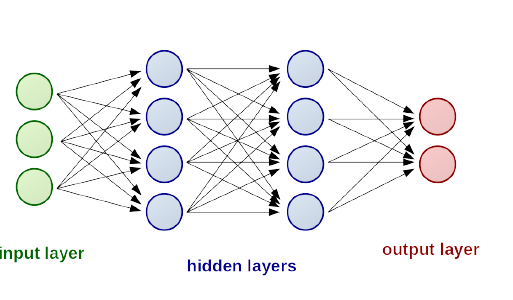

### Structure of network

We will, as a start consider a shallow network with one input layer with 100 nodes, and an one output layer with one node, yielding the probability of each event to be <i>signal</i> , or <i>background</i> and we will compare with a deep network with 5 hidden layers 

### Activation function

The choice of <b>activation function</b> is tanh for the input and hidden layers, and sigmoid for the output, which is a canonical choice for classification problems. A popular alternative choice for the hidden layers is a RELU function

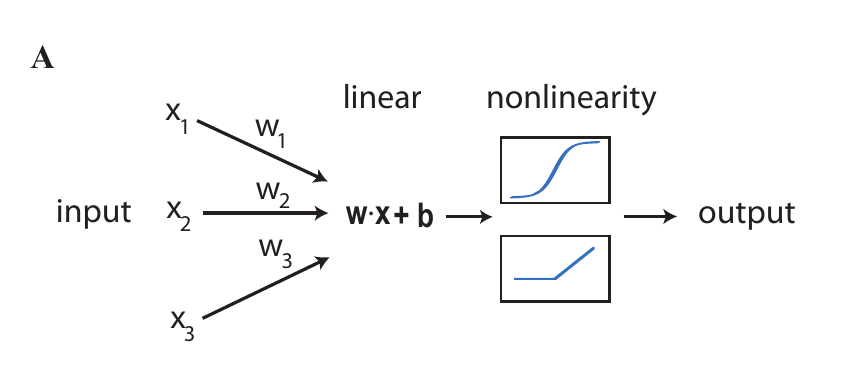

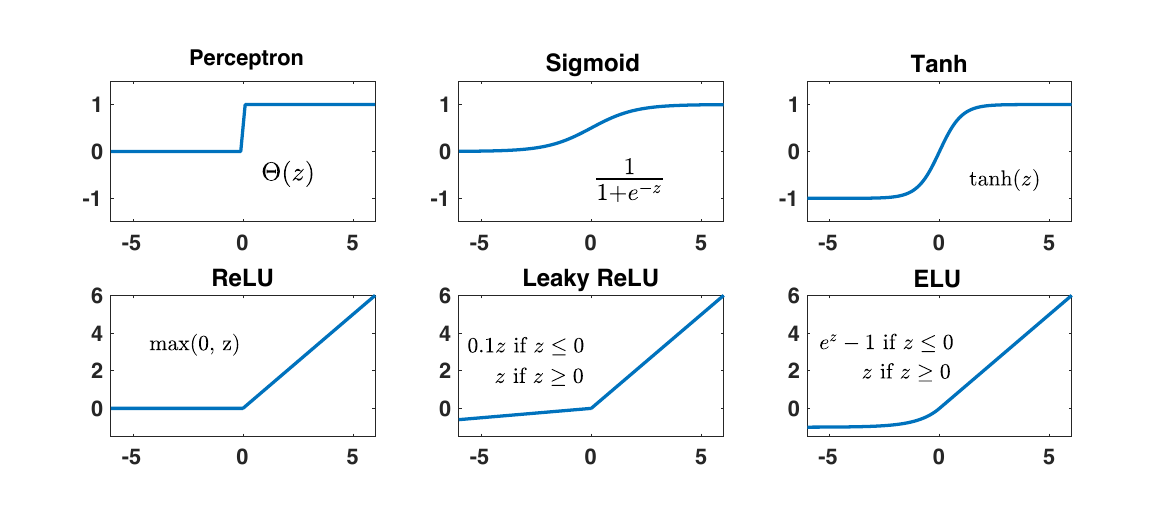

### Activation function

The <b>loss function</b> we are going to use is  a canonical choice for binary classification problem, <b>cross-entropy</b>.

The usage of the sigmoid and of cross-entropy is justified in terms of logistic regression, i.e 
the situation where each set of features $\mathbf{x}_i$ is associated with a category $C_i\in\{1,0\}$, with $i=1\ldots n$. It is helpful to re-define $\mathbf{x}$ to be an extended vector $\mathbf{x}\rightarrow (1,\mathbf{x})$. In terms of sequential network this corresponds to a single layer with $n$ inputs and a single output and a sigmoid activation function. The Likelihood function for Logistic regression is given by the sigmoid function

$$
P(c_i=1)=1-P(c_i=0)= {1 \over 1+ e^{-\mathbf{w}\cdot \mathbf{x}_i}},
$$

where $\mathbf{w}$ are the weights that define the logistic regression. Notice that this is just the Fermi function with $\beta E=-\mathbf{w}\cdot \mathbf{x}$ https://en.wikipedia.org/wiki/Fermi%E2%80%93Dirac_statistics.


The training process consists in finding the vector $\mathbf{w}$ that maximises the Log-likelihood of the observed data. Let us define the function
$$
f(a)={1 \over 1+ e^{-a}},
$$
Notice that the derivative with respect to $a$ is given by
$$
{df \over da}= f(1-f).
$$

Define $f_i \equiv f(\mathbf{w}\cdot \mathbf{x}_i)$. Then, the Likelihood of the data $\{ \mathbf{x}_i, C_i \}$ is given by
$$
P(Data|\mathbf{x})= \prod_{i=1}^n f_i^{C_i}(1-f_i)^{1-C_i}
$$
and the log-likelihood is given by
$$
\log{P(Data|\mathbf{w})}= \sum_{i=1}^n C_i \log f_i + (1-C_i)\log(1-f_i)
$$

The negative of the log-likelihood gives us the cross-entropy error function
$$
\mathrm{Cross\,Entropy}=E(\mathbf{w})= -\sum_{i=1}^n C_i \log f_i + (1-C_i)\log(1-f_i).
$$

### Metrics

The <b>metrics</b> for the optimisation is a function of the result which we can use to evaluate its performance. We use  the <b>accuracy</b>, i.e. how often the network classifies correctly an event. Since the network outputs a probability between zero and one, an event is classified as signal if probability is >0.5 and background if probability is <0.5.

### Optimiser

For the <b>optimiser</b> we consider two options: <b>Stochastic Gradient Descent</b> (SGD) and <b>Adam</b>

In the SGD algorithm, the DNN parameters θ are modified by the negative gradient
multiplicated by the learning rate $\eta$

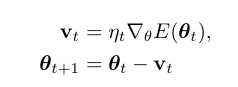

with 

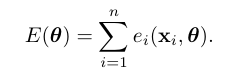

where $i$ runs over all events, and in our case $e_{i}$ is the cross-entropy.

The gradient is calculated through a back-propagation algorithm.

#### Learning rate

The $\eta$ paramter drives the speed of convergence. Too low a parameter gives a slow convergence, too high a parameter may get the minimisation to diverge

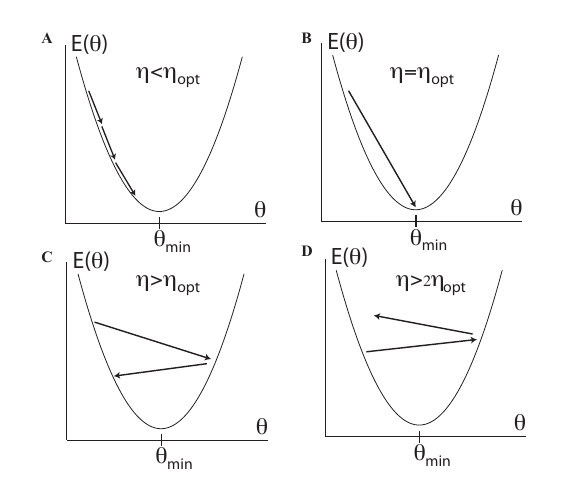

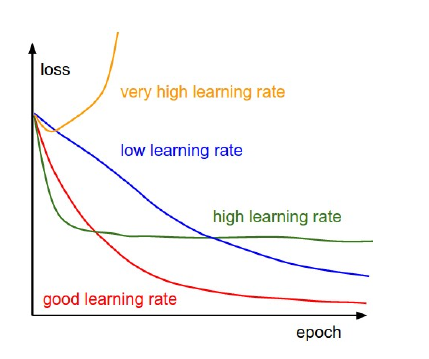

### Minibatches and Epochs

The stochasticity of the gradient descent is ensured by running each step not on the full sample, but on minibatches of size  <b>batch-size</b> with batch-size much smaller than the total data sample. The idea is that the vector of parameter theta is updated for each minibatch, and we call an <b>epoch</b> when we have looped over all minibatches.

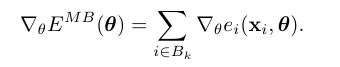

The rationale is that a gradient descent gets easily locked into a false minumum, and running on many minibatches avoids that this happens


A related algorithm is the ADAM optimizer. In ADAM, we keep a running average of both the first and
second moment of the gradient and use this information to adaptively change the learning rate for different parameters. In addition to keeping a running average of thefirst and second moments of the gradient. 
The advantages of ADAM wrt SGD are: (i) adapting our step size so that we cut off large gradient directions (and hence prevent oscillations and divergences), and (ii) measuring gradients in terms of a natural length scale, the standard deviation on the paramters.

Empirically, ADAM does not need to be tuned, and typically has better traininig performance than SGD, but in literature it is found that it generalises somewhat worse

In [37]:
#
#  define function for running NN, which in turn includes function 
#  for creating the model
#

import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.utils     import plot_model
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)



def make_model(varnum, nodes, layers, reg, drop):  
# Create model
  model = keras.Sequential()
# add input layer
  model.add(keras.layers.Dense(nodes, input_dim=varnum, activation='tanh'))
  if(drop>0):
    model.add(Dropout(drop))
# 
#
#  add hidden layers
#
  for i in range (0,layers):
    if(reg==0):
      print ("add no-reg layer")
      model.add(keras.layers.Dense(nodes,  activation='tanh'))
    else:
      print (" add reg layer")
      model.add(keras.layers.Dense(nodes,  kernel_regularizer=l1(reg), activation='tanh'))
    if(drop>0):
      model.add(Dropout(drop))
#
# add output layer
#
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  

  model.summary()
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model    

def run_nn(X_train, X_test, y_train, y_test, savemod, savelog, nodes, layers, reg, drop, epochs=-1):

# Define number of input variables as size of one row of the training dataframe
  varnum=X_train.shape[1]
# Create model
  model = make_model(varnum, nodes,layers, reg, drop)
#
#  Set up callbacks during optimisation 
#
#  define early stopping. The programme monitors the value of the validation loss, and it
#  stops the optimisation when it does not decrease for 'patience' validation epochs
#  one has to put a patience parameter because the validation loss may fluctuate
#  and because one the optimisation may flattem out for some time and then restart
#
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)
#
#  whenever the loss value is improved save the model, in this way at the end 
#  of the optimisation one will have the best model found on disk
#
  mc = ModelCheckpoint(savemod, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
#
#  log onto file the values of accuracy and loss for each step in the optimisation
#
  hl = CSVLogger(savelog, separator=",", append=False)
#
#  fit model
#
  if(epochs<=0):
     history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                         batch_size=200, epochs=200000, callbacks=[es, mc, hl], verbose=0)
  else: 
     history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                         batch_size=200, epochs=epochs, callbacks=[mc, hl], verbose=0)

  score = model.evaluate(X_test, y_test, verbose=0)

  print('Test score:', score[0])
  print('Test accuracy:', score[1])
  return history



Once we have set up the libraries for creating and fitting the NN, we need to define the input vector X, including all of the columns except the label one, and the target vector including only the label.

For the X vector we prepare two  variations, the version  with only low-level variables, and the one with all of the variables. The first exercise will thn be done using the full set of variables 

In [38]:
#Define vectors for input to NN 

# Use first column as definition of target
y = df['SIG'].values

# Three different sets: full, only low features

X = df[[col for col in df.columns if col!="SIG"]]
X_low=X[low_features]
X_high=X[high_features]

We need to define a set for the training and a set for the test, sklearn provides a method which performs a splitting based on the desired size for  the test. In our case we separate 20% of the events corresponding to 48k events. After that we run the neural network. 
Note that for future ues we store the history of the traning, and the set of weights corresponding to the step with best accuracy on the test sample

In [39]:
from sklearn.model_selection import train_test_split
# create test and train samples for both full feature set, and low level features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X_low, y, test_size=.2, random_state=0)

In [40]:
# define the name of the files where we save the best model and the training history
savemod="best_mod.h5"
savelog="history.csv"
history=run_nn( X_train, X_test, y_train, y_test, savemod, savelog, 100, 5, 0, 0, 50)
    

add no-reg layer
add no-reg layer
add no-reg layer
add no-reg layer
add no-reg layer
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               2900      
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
___________________________________

## Evaluating the classifier performance

### Learning curve

The performance of the network can be evaluated by inspecting the learning curve, i.e plottong  the loss for each epoch, both for the training and for the test sample. A healty situation correspond to the case where train and test follow each other as more ephochs are added, up to the moment where both flatten out.  When the  loss value for the training sample is much better than the one for the test sample we have a case of overfitting, i.e. 
the model instead of picking up generic features of the sample, it picks up noise, i.e. it tries to reproduce the features of the specific events in the training sample

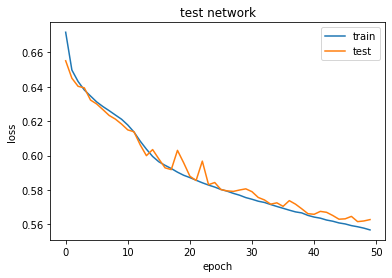

In [41]:
import matplotlib.pyplot as plt

# plot the 
def plothis(history, title):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
#  plt.show()

def plothis_file(filehis, title):
  hh = pd.read_csv(filehis, header=0, engine='python')   
  plt.plot(hh['loss'].values)
  plt.plot(hh['val_loss'].values)
  plt.title(title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
plothis(history, 'test network')
#plothis_file(savelog, 'test network')

There is almost no overfitting, i.e. the performance for the test sample matches the one  for the training sample.
However, it is rather clear that we have stopped the training too early.

To get a better view of what happens when we run the optimisation on the same sample up to the point where the loss on the test sample does not improve, let's load the best model from a complete run with the same network and the same sample, and look at the full history

In [9]:
import os 

if(os.path.exists('240k_mod_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/ernqamitd2n0m32/240k_mod_deep_all.h5')
hisfull='https://www.dropbox.com/s/q2qpli48kmwcfr6/240kdefhist_deep_all.csv?dl=1'
savemod1='240k_mod_deep_all.h5'

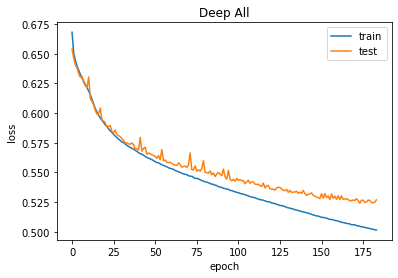

In [10]:
import pandas as pd

plothis_file(hisfull, 'Deep All')



### Probability distributions for signal and backround

The output of the classification is for each event a number between 0 and 1 representing the probability that that event is a signal event. Since for each event we know whether it was a signal (SIG=1) or a background (SIG=0), we can plot the output probability of the network for each of the two classes
Lets do it for the model with the best preformance on the test sample, which was saved as best_model.h5: first lets load it, and then lets try to evaluate the performance of the classification.

In [42]:
def pred_model(modfile, X_test):
# load the saved model
  best_model = load_model(modfile)

#predict the output on the test sample

  Ypredt = best_model.predict(X_test)
  return Ypredt

def plot_prob(y_test, Ypredt):

    #build a dataframe with as columns the output PROB and the label (SIG)

  df_test_acc = pd.DataFrame({'PROB':Ypredt[:,0]})
  df_test_acc['SIG']=y_test

# split according to the label
  df_test_acc_bkg = df_test_acc.query('SIG==0')
  df_test_acc_sig = df_test_acc.query('SIG==1')
  print('nsig ',df_test_acc_sig.shape[0])
  print('nbkg ',df_test_acc_bkg.shape[0])

  bins = np.linspace(0, 1,50)
  plt.hist(df_test_acc_bkg.PROB, bins, alpha=0.5, density=True, label='Background')
  plt.hist(df_test_acc_sig.PROB, bins, alpha=0.5, density=True, label='Signal')
  plt.legend(loc='best')
  plt.show()


#plot
#  fig, axes = plt.subplots(1, 2, figsize=(14,5))
#  df_test_acc_sig.plot(kind='hist', ax=axes[0], y='PROB',color='blue',bins=np.linspace(0,1,100),label='Signal')
#  axes[0].set(xlabel="PROB", ylabel="Frequency")
#  df_test_acc_bkg.plot(kind='hist',ax=axes[1], y='PROB',color='red',bins=np.linspace(0,1,100),label='Background')
#  axes[1].set(xlabel="PROB", ylabel="Frequency")
#  plt.show()

Lets look at the probability for 50 epochs 

nsig  25305
nbkg  22695


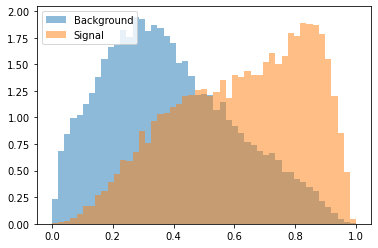

In [43]:
Ypredt50=pred_model(savemod, X_test)
plot_prob(y_test, Ypredt50)


Now look at the probability for 175 epochs

nsig  25305
nbkg  22695


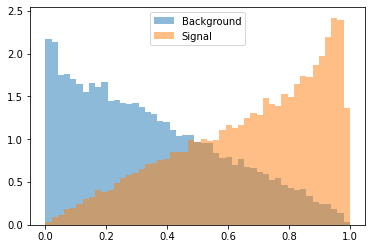

In [13]:
Ypredt=pred_model(savemod1, X_test)
plot_prob(y_test, Ypredt)

As expected, the probability distribution is peaked values>0.5 for the signal and at values<0.5  for the backgrounds.

### Receive Operating Characteristic (ROC) Curve

In order to perform our the final selection we put  a lower limit on the value of the probability and we count the fraction of events above this limit for both signal and backround, i.e for each value of PROB we have two 
values: The 'true positive rate (TPR)' (efficiency of signal selection in HEP language), and 'false positive rate (FPR)' (efficency for selecting background). If we TPR versus FPR the other as a function of PROB we obtain  a curve called the Receive Operating  Characteristic (ROC) curve https://en.wikipedia.org/wiki/Receiver_operating_characteristic. Methods for building the ROC curve are availabel in sklearn.metrics.
An ideal ROC curve would be along upper x and left y axes of the plot, corresponding to the case where all of the signal events have PROB=1 and all background events have PROB=0. The worst case is a curve where TPR=FPR, i.e. the discrimination power is the same as extracting a random number for PROB. 

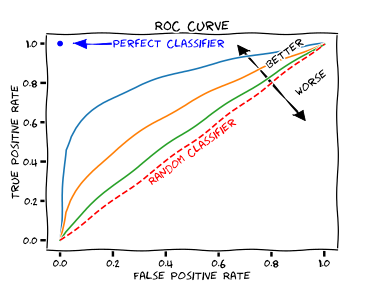

A measure of how near the ideal our ROC curve is is the 'area under the curve' (AUC), which is also available in sklearn metrics. The ideal case would have AUC=1 and th worst case AUC=0.5

test sample  auc  0.8203426006205239


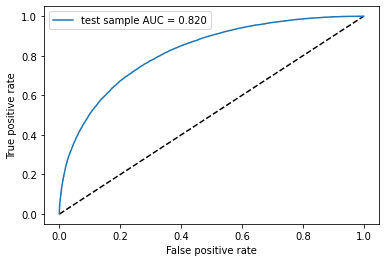

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

def plot_roc_base(y_test, Ypredt, labroc):
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, Ypredt)
  auc_keras = auc(fpr_keras, tpr_keras)
  print(labroc," auc ",auc_keras)
  plt.plot(fpr_keras, tpr_keras, label=labroc+' AUC = {:.3f}'.format(auc_keras))

def plot_roc_single(y_test, Ypredt, labroc):
   plt.plot([0.001, 1], [0, 1], 'k--')
   plot_roc_base(y_test, Ypredt, labroc)
   plt.xlabel('False positive rate')
   plt.ylabel('True positive rate')
   plt.legend(loc='best')
   plt.show    
    

plot_roc_single(y_test,Ypredt, 'test sample')



<b>Exercise:</b> Show that with a random assignation of probabilities AUC is 0.5 and with perfect identification is 1



import numpy as np

plot_roc_single(y_test,y_test, 'perfect')
nevtest=y_test.shape
print (nevtest)

yran=np.random.rand(nevtest[0])
plot_roc_single(y_test,yran, 'random')


### Discovery significance in HEP

In a typical classification task one evaluates the values of TPR and FPR for PROB=0.5.

In HEP the situation is different. As already explained, we typically have a number of background events which is several order of magnitude larger than the signal, and we want to define a selection which maximises the statistical significance for observing a signal $s$ over a known background $b$. 

Ignoring the uncertainty on the background estimate, the sensitivity, based  on profile likelihood ratio test (following e.g. http://www.pp.rhul.ac.uk/~cowan/atlas/cowan_statforum_8may12.pdf, the published paper is https://arxiv.org/pdf/1007.1727.pdf ) can be written as: 

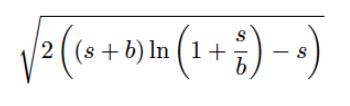

which reduces to the standard Poisson

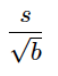

 if $b>>s$

More realistically, if the background is known with a systematic uncertainty $\sigma_{b}$ which depends on the techniques used to estimate the expected background, the formula for the significance becomes: 

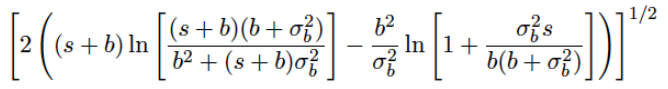

Canonically when predicting the sensitivity of an experiment, we say that a signal yielding Z=2 can be excluded at 95\%. With Z=3 on real data one writes a paper with 'Evidence for' in the title, with Z=5 the title becomes 'Observation of', and the theorist who has invented the model goes to Stockholm.

In order to calculate the significance, we need the asolute normalisation of our signal and background samples, i.e. the number of signal and background events which we expect in our data before we apply the classification algorithm.

For the HIGGS exercise we assume 100 signal events and 5000  background events

In [15]:
from numpy import sqrt
from math import log
from numpy import nanmax

#
#  calculate significance based on asymptotic formulas 
#
def calc_sig(nsig, nbg, nbExpEr):
    nbObs=nsig+nbg
    nbExp=nbg
    if nbExp>0 and nbExpEr>0:
      factor1 = nbObs*log( (nbObs*(nbExp+nbExpEr**2))/(nbExp**2+nbObs*nbExpEr**2) )
      factor2 = (nbExp**2/nbExpEr**2)*log( 1 + (nbExpEr**2*(nbObs-nbExp))/(nbExp*(nbExp+nbExpEr**2)) )
      signi  = sqrt(2*(factor1 - factor2))
    if nbExp>0 and nbExpEr==0:
      signi=sqrt(2*((nsig+nbg)*log(1+nsig/nbg)-nsig))
    if nbExp==0 and nbExpEr==0:
      signi=sqrt(nsig)
    if nbExp==0 and nbExpEr>0:
      signi=nsig/sqrt(nbExpEr)
    return signi
#
#   calculate significance for a discriminator yielding
#   predictions Ypredt for labels y_test, assuming
#   nsigtot:  number of signal events before selection
#   nbgtot: nuber of background events before selection
#   errfbg: fractional systematic uncertainty on background
#
def plot_signi_base(y_test, Ypredt, nsigtot, nbgtot, errfbg, lab):
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, Ypredt)
  n_bg=fpr_keras*nbgtot
  n_sig=tpr_keras*nsigtot
  errbg=errfbg*n_bg
  signi=[]
  thr=[]      
  for i in range(1,len(n_sig)):
      if(thresholds_keras[i]>0.):
        signi.append(calc_sig(n_sig[i],n_bg[i],errbg[i]))
        thr.append(thresholds_keras[i])        
  imax=-1
  signimax=0.
  for i in range(0,len(signi)):
     if signi[i]>signimax:
        imax=i
        signimax=signi[i]  
  maxs=nanmax(signi)
  print(lab+":") 
  print(" max significance is  ",signimax," nbg ",n_bg[imax]," nsig ",n_sig[imax]," cut ",thresholds_keras[imax])
  print(" background efficiency: ", n_bg[imax]/nbgtot," signal efficiency: ", n_sig[imax]/nsigtot )
  plt.plot(thr,signi, label=lab)
    
  plt.xlabel('Cut on PROB')
  plt.ylabel('Significance')


  return thr, signi, imax

nbg 5000:
 max significance is   1.9926711178833862  nbg  102.22515972681208  nsig  23.48152539023908  cut  0.88582134
 background efficiency:  0.020445031945362416  signal efficiency:  0.2348152539023908


<function matplotlib.pyplot.show(close=None, block=None)>

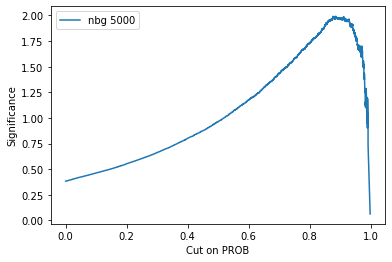

In [59]:
nstot=100
nbtot=5000
bfr=0.05
thr, signi, imax=plot_signi_base(y_test, Ypredt,nstot,nbtot,bfr, 'nbg '+str(nbtot))
plt.legend(loc='best')
plt.show

One sees that for a HEP analysis, in a high background environment one goes for very high rejection factors on the background, accepting a relatively low background efficiency (typical values in a LHC search analysis are order a few percent)

Compare now with cut and count exercise in previous notebook

In [60]:

import math
from math import sqrt

# define one dataframe containing only the signal events and one containing only the background events
df_bkg=df.query('SIG==0')
df_sig=df.query('SIG==1')
# apply a selection on variables
cut='m_bb<0.95 and m_bb>0.8 and m_wbb>0.89 and m_wwbb<0.87 and m_wwbb>0.775'
df_sel_sig = df_sig.query(cut)
df_sel_bkg = df_bkg.query(cut)
# calculate and print the efficency of the selection
beff=df_sel_sig.shape[0]/df_sig.shape[0]
seff=df_sel_bkg.shape[0]/df_bkg.shape[0]
nsigcc=beff*nstot
nbkgcc=seff*nbtot
nbExpErcc=nbkgcc*bfr
sigcc=calc_sig(nsigcc, nbkgcc, nbExpErcc)
print(" cc significance is  ",sigcc," nbg ",nbkgcc," nsig ",nsigcc)
print(" background efficiency: ", beff," signal efficiency: ", seff )



 cc significance is   1.1826597595111141  nbg  48.71634203814349  nsig  9.03063358881057
 background efficiency:  0.0903063358881057  signal efficiency:  0.009743268407628698


<b>Exercise</b>: Play around with  the parameters nsigtot, nbgtot and errfbg to understand how the sensitivity depends on the total number of signal and background events,  and on the uncertainty on background estimate   estimate

### Inspection of the impact of selection on variables

In order to understand what the NN does, it can be useful to plot the distribution of the variables for accepted and rejected events, and their correlations.

In [17]:
# create dataframe adding probability of selector and label to X_test
df_test_plot=X_test.copy(deep=True)
df_test_plot['PROB']=Ypredt
df_test_plot['SIG']=y_test

# define as selection criterion the cut on probability giving the maximum significance
cut=thr[imax]
#cut=0.5
sel1='PROB>'+str(cut)
sel2='PROB<'+str(cut)
sel3='SIG==1'
sel4='SIG==0'

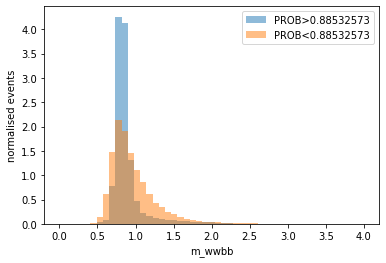

In [18]:
def plot_varsel(df, sel1, sel2, var, blow, bhigh, nbin):
  df_pass = df.query(sel1)
  df_nopass = df.query(sel2)
  bins = np.linspace(blow, bhigh, nbin)
  plt.hist(df_pass[var], bins, alpha=0.5, density=True, label=sel1)
  plt.hist(df_nopass[var], bins, alpha=0.5, density=True, label=sel2)
  plt.legend(loc='best')
  plt.xlabel(var)
  plt.ylabel('normalised events')
  plt.show()



plot_varsel(df_test_plot, sel1, sel2, 'm_wwbb', 0, 4, 50)

#  bins = np.linspace(0, 4,50)
#  plt.hist(df_test_plot_sig_nopass.m_bb, bins, alpha=0.5, density=True, label=sel)
#  plt.hist(df_test_plot_sig_pass.m_bb, bins, alpha=0.5, density=True, label=sel1)
#  plt.legend(loc='best')
#  plt.xlabel(var)
#  plt.ylabel('normalised events')
#  plt.show()

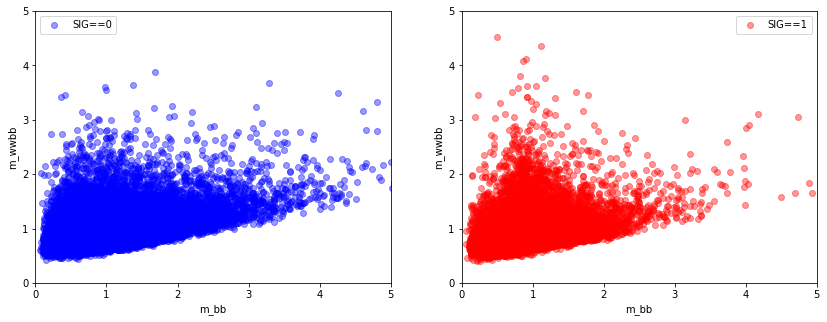

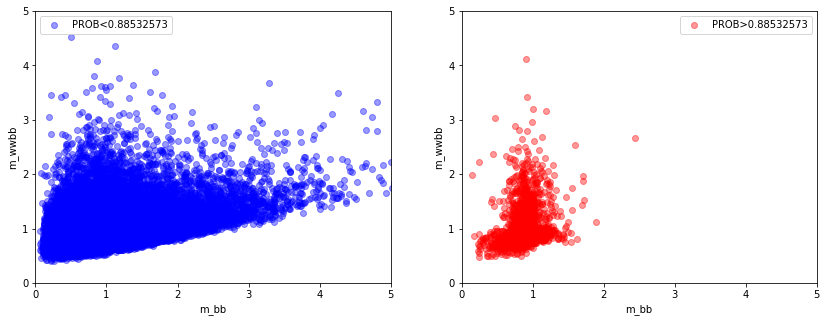

In [19]:
def plot_scat(df, sel1, sel2, var1, var2, blx, bhx, bly, bhy):
  df_pass = df.query(sel1)
  df_nopass = df.query(sel2) 
  fig= plt.figure(figsize=(14,5))
  plt.subplot(1, 2,1)
  plt.xlim([blx,bhx])
  plt.ylim([bly,bhy])
  plt.plot(df_nopass[var1], df_nopass[var2], 'bo', alpha=0.4, label=sel2)
  plt.legend(loc='best')
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.subplot(1, 2,2)
  plt.xlim([blx,bhx])
  plt.ylim([blx,bhx])
  plt.plot(df_pass[var1], df_pass[var2], 'ro', alpha=0.4, label=sel1)
  plt.legend(loc='best')
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.show()

plot_scat(df_test_plot, sel3, sel4, 'm_bb', 'm_wwbb', 0, 5, 0, 5)
plot_scat(df_test_plot, sel1, sel2, 'm_bb', 'm_wwbb', 0, 5, 0, 5)
#plt.scatter(df_test_plot['m_bb'], df_test_plot['m_wbb'], alpha=0.05)
#plt.show()

#plvar('m_bb','m(bb)',0,4,50)
#plvar('m_wwbb','m(wwbb)',0,2,50)
#plvar('axial_MET','axial MET',0,10,50)

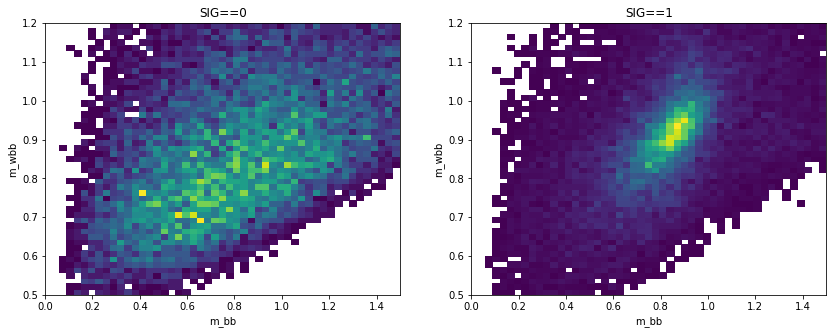

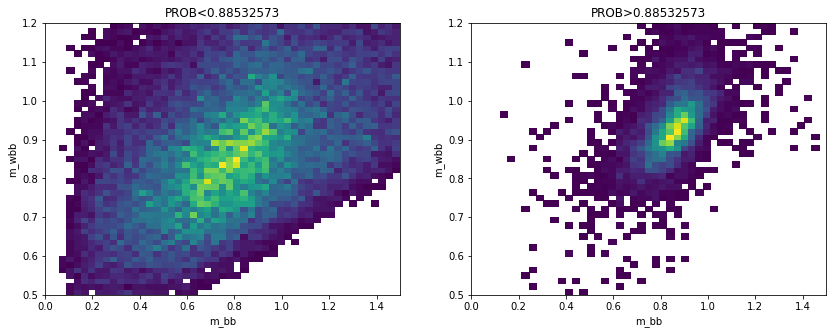

In [20]:
def plot_2d(df, sel1, sel2, var1, var2, nbx, blx, bhx, nby, bly, bhy):
  df_pass = df.query(sel1)
  df_nopass = df.query(sel2) 
  binsx = np.linspace(blx, bhx, nbx)
  binsy = np.linspace(bly, bhy, nby)
  fig= plt.figure(figsize=(14,5))
  plt.subplot(1, 2,1)
  plt.hist2d(df_nopass[var1], df_nopass[var2], bins=[binsx, binsy], density=False, cmin=0.5)
  plt.title(sel2)
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.subplot(1, 2,2)
  plt.hist2d(df_pass[var1], df_pass[var2], bins=[binsx,binsy],  density=False, cmin=0.5)
  plt.title(sel1)
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.show()

plot_2d(df_test_plot, sel3, sel4, 'm_bb', 'm_wbb', 50, 0., 1.5, 50, 0.5, 1.2)
plot_2d(df_test_plot, sel1, sel2, 'm_bb', 'm_wbb', 50, 0., 1.5, 50, 0.5, 1.2)

After learning how to evaluate the results of a DNN classifier, based on a validation sample split out
of the trainig sample, we load in independent sample of 100k events, on which we want to study the performance 
of different variantions  of the classifier

In [21]:
import os

print("start loading test samples")


linkxl='https://www.dropbox.com/s/b2o0x1ybnodgrr8/100k_X_testl.csv.gz?dl=1'
linkyl='https://www.dropbox.com/s/banybphgceqw7dj/100k_y_testl.csv.gz?dl=1'
linkx='https://www.dropbox.com/s/bs6qhvr5e68ljp3/100k_X_test.csv.gz?dl=1'
linky='https://www.dropbox.com/s/6r6vlwr4uycyfpn/100k_y_test.csv.gz?dl=1'

N=100000
df_x_l = pd.read_csv(linkxl, compression='gzip', header=None,nrows=N,engine='python')
df_y_l = pd.read_csv(linkyl, compression='gzip', header=None,nrows=N,engine='python')
X_testal=df_x_l.values
y_testal=df_y_l.values
df_x = pd.read_csv(linkx, compression='gzip', header=None,nrows=N,engine='python')
df_y = pd.read_csv(linky, compression='gzip', header=None,nrows=N,engine='python')
X_testa=df_x.values
y_testa=df_y.values

print("Test samples loaded")


start loading test samples
Test samples loaded


<b>Exercises</b>:

1) Try different parameter settings:

  * relu instead of tanh

  * modify learning rate  of SGD optimizer : tru 0.1 or 0.05
    
  * change optimizer:  try Adam
    
2) Extract corresponding results for SUSY sample: compare all and low level variables

## Results on 240k sample 

The four variations of the model we are looking at, following the work of Baldi et al are:
    
* A shallow network with a single hiden layer using as input only low level variables

* A shallow network with a single hidden layer using both low level and high level variables

* A deep network with a 6 hiden layers using as input only low level variables

* A deep network with 6 hidden layer using both low level and high level variables

The way the networks were trained is shown commented in the cell below. Differently from the model we have trained on the, spot, in this case we let an 'early stop' algorithm decide when to stop the training. This means that the four optimisations take some time, so we performed the trainig offline and we saved the output model on file 

In [22]:
#runlab="240k"
#savemod=runlab+"mod_shallow_low.h5"
#savelog=runlab+runlab+"hist_shallow_low.csv"
#history=run_nn( X_trainl, X_testl, y_trainl, y_testl, savemod, savelog, 100, 0, 0, 0)
# deep
#savemod=runlab+"_mod_deep_low.h5"
#savelog=runlab+"hist_deep_low.csv"
#history=run_nn( X_trainl, X_testl, y_trainl, y_testl, savemod, savelog, 100, 5, 0, 0)

#savemod=runlab+"_mod_shallow_all.h5"
#savelog=runlab+"hist_shallow_all.csv"
#history=run_nn( X_traina, X_testa, y_traina, y_testa, savemod, savelog, 100, 0, 0, 0)
# deep
#savemod=runlab+"_mod_deep_all.h5"
#savelog=runlab+"hist_deep_all.csv"
#history=run_nn( X_traina, X_testa, y_traina, y_testa, savemod, savelog, 100, 5, 0, 0)


We load the files downloading it from dropbox.
The h5 files contains the structure of the network and all of the weights at the point in time where the model was saved. It can be thus loaded, and used to extract predictions for any sample with the same shape as the training sample.

We calculate the AUC and the significance for the four models

loading models
models loaded
all deep  auc  0.8185176970484177
all shal  auc  0.7867888598946625
low deep  auc  0.7422294696771038
low shal  auc  0.7157566834233282
all deep:
 max significance is   2.047973097925728  nbg  51.3724074978241  nsig  16.425613975384266  cut  0.9217758
 background efficiency:  0.01027448149956482  signal efficiency:  0.16425613975384265
all shal:
 max significance is   1.4457755242937882  nbg  178.84815420213556  nsig  23.904864537840545  cut  0.8199849
 background efficiency:  0.035769630840427113  signal efficiency:  0.23904864537840545
low deep:
 max significance is   1.0714299312807891  nbg  223.21523340480186  nsig  20.350518972264762  cut  0.7976888
 background efficiency:  0.04464304668096037  signal efficiency:  0.2035051897226476
low shal:
 max significance is   0.9250203736626341  nbg  309.93270639183135  nsig  22.048286162630216  cut  0.72746325
 background efficiency:  0.06198654127836627  signal efficiency:  0.22048286162630215


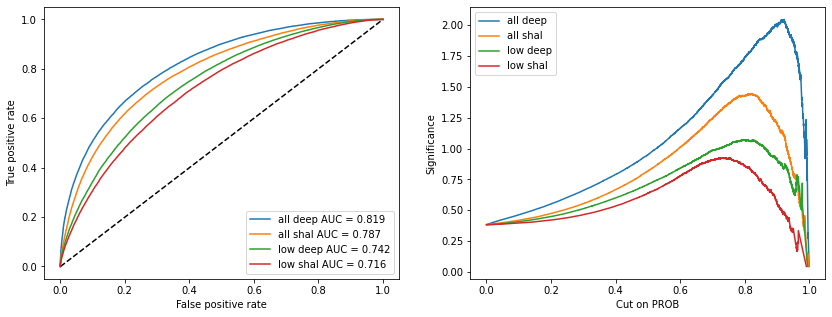

In [23]:
import os

print('loading models')
if(os.path.exists('240k_mod_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/ernqamitd2n0m32/240k_mod_deep_all.h5')
if(os.path.exists('240k_mod_deep_low.h5')==False):
  os.system('wget https://www.dropbox.com/s/uwnj21cfd4j3i5g/240k_mod_deep_low.h5')
if(os.path.exists('240k_mod_shallow_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/96xvaft927nvxwn/240k_mod_shallow_all.h5')
if(os.path.exists('240k_mod_shallow_low.h5')==False):
  os.system('wget https://www.dropbox.com/s/w0b6o1r5b41te8d/240k_mod_shallow_low.h5')
print('models loaded')
fig= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
plt.plot([0.001, 1], [0, 1], 'k--')
Ypred1s=pred_model("240k_mod_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred1s,"all deep")
Ypred2s=pred_model("240k_mod_shallow_all.h5", X_testa)
plot_roc_base(y_testa,Ypred2s,"all shal") 
Ypred3s=pred_model("240k_mod_deep_low.h5", X_testal)
plot_roc_base(y_testal,Ypred3s,"low deep")
Ypred4s=pred_model("240k_mod_shallow_low.h5", X_testal)
plot_roc_base(y_testal,Ypred4s,"low shal") 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.subplot(1, 2,2)
thr, signi, imax=plot_signi_base(y_testa, Ypred1s, 100, 5000, 0.05, 'all deep')
thr, signi, imax=plot_signi_base(y_testa, Ypred2s, 100, 5000, 0.05, 'all shal')
thr, signi, imax=plot_signi_base(y_testal, Ypred3s, 100, 5000, 0.05, 'low deep')
thr, signi, imax=plot_signi_base(y_testal, Ypred4s, 100, 5000, 0.05, 'low shal')
plt.legend(loc='best')
plt.show()


## Results on 11M sample

All the exercises above were performed by trainig on a 240k events sample which is split 80% in a trainid and 20% on a validation sample.  This was done in order to have a reasonable running time for the hands-on exercises

It is interesting, though, also to see the performance on the full HIGGS sample, made of 11M events, comparing the performance for low-level variables and for the full set of features including the invariant mass variables, and how different is the performance of a shallow neural network with a single input layer  is with respect to a deep network with 5 layers.

You can try to obtain the same result yourselves, but you will need a powerful machine with lots of memory. 

loading models
models loaded
all deep  auc  0.8703418894224338
all shal  auc  0.8375920513827413
low deep  auc  0.8696594146473042
low shal  auc  0.7833352274945676
all deep:
 max significance is   3.2331943071600784  nbg  18.468592778143375  nsig  15.898133968578074  cut  0.9678751
 background efficiency:  0.003693718555628675  signal efficiency:  0.15898133968578074
all shal:
 max significance is   2.2543298780759238  nbg  35.345065489205425  nsig  14.860189439056207  cut  0.92895615
 background efficiency:  0.007069013097841085  signal efficiency:  0.14860189439056207
low deep:
 max significance is   3.115752267399306  nbg  1.379837391470482  nsig  5.0706142589756675  cut  0.98894966
 background efficiency:  0.0002759674782940964  signal efficiency:  0.05070614258975668
low shal:
 max significance is   1.304386758156212  nbg  231.06969240240304  nsig  25.500538823662865  cut  0.79832125
 background efficiency:  0.04621393848048061  signal efficiency:  0.25500538823662866


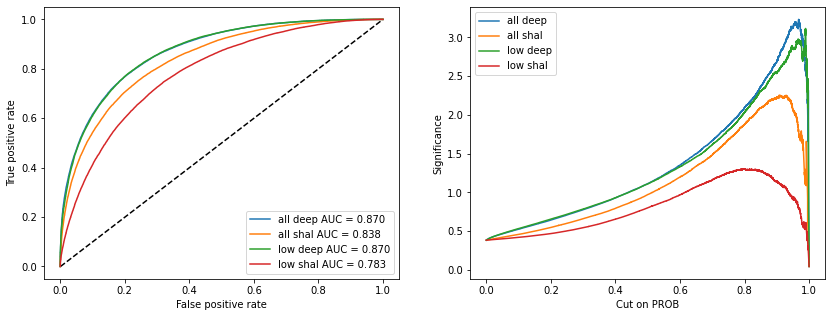

In [24]:
import os
import os.path

print('loading models')
if(os.path.exists('11M_nor_mod_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/lthto3apjbru22u/11M_nor_mod_deep_all.h5')
if(os.path.exists('11M_nor_mod_deep_low.h5')==False):
  os.system('wget https://www.dropbox.com/s/rshcgkte1lq5ofy/11M_nor_mod_deep_low.h5')
if(os.path.exists('11M_nor_mod_shallow_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/fcf9vwawfmu8ygb/11M_nor_mod_shallow_all.h5')
if(os.path.exists('11M_nor_mod_shallow_low.h5')==False):
  os.system('wget https://www.dropbox.com/s/zhck75rbuzqoxz1/11M_nor_mod_shallow_low.h5')
print('models loaded')

fig= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)    
plt.plot([0.001, 1], [0, 1], 'k--')
Ypred1=pred_model("11M_nor_mod_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred1,"all deep")
Ypred2=pred_model("11M_nor_mod_shallow_all.h5", X_testa)
plot_roc_base(y_testa,Ypred2,"all shal") 
Ypred3=pred_model("11M_nor_mod_deep_low.h5", X_testal)
plot_roc_base(y_testal,Ypred3,"low deep")
Ypred4=pred_model("11M_nor_mod_shallow_low.h5", X_testal)
plot_roc_base(y_testal,Ypred4,"low shal") 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

plt.subplot(1, 2,2)
thr, signi, imax=plot_signi_base(y_testa, Ypred1, 100, 5000, 0.05, 'all deep')
thr, signi, imax=plot_signi_base(y_testa, Ypred2, 100, 5000, 0.05, 'all shal')
thr, signi, imax=plot_signi_base(y_testal, Ypred3, 100, 5000, 0.05, 'low deep')
thr, signi, imax=plot_signi_base(y_testal, Ypred4, 100, 5000, 0.05, 'low shal')
plt.legend(loc='best')
plt.show()


Slides for comparison https://www.dropbox.com/s/9k1vz6vm82kbgmq/ml_lecture.pdf?dl=0

# Optimisation of the performance

As seen above, the definition of a classifier with keras has a large number of parameters. In order to optimise the performance one has to run the optimisation with different parameters, as there is no fixed rule on how to optimise the networks, only a number of heuristic prescriptions dictated by experience

For a complex multidimensional case such as the Higgs exercise we are performing, unleashing the full power of ML requires a large number of parameters, and a very large amount of training data

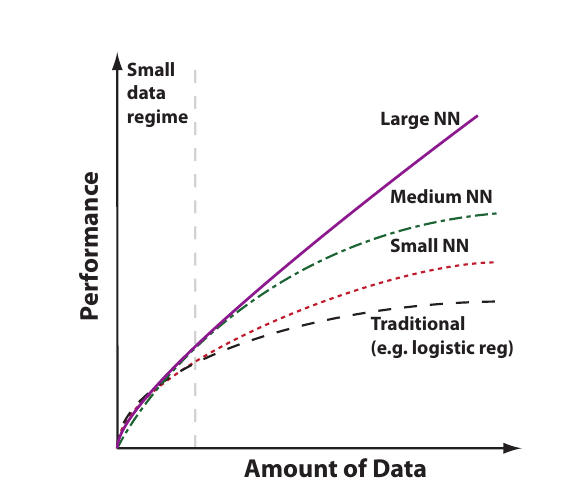

<b>Exercise:</b>  Compare for the same network configuration the results for 240k and 11M to verify the different level of growth for different networks 

A common problem is that as soon one goes for network with large number of paramters the system tends to badly overfit the training data. The key concept is the <b>representational capacity</b> of the network 

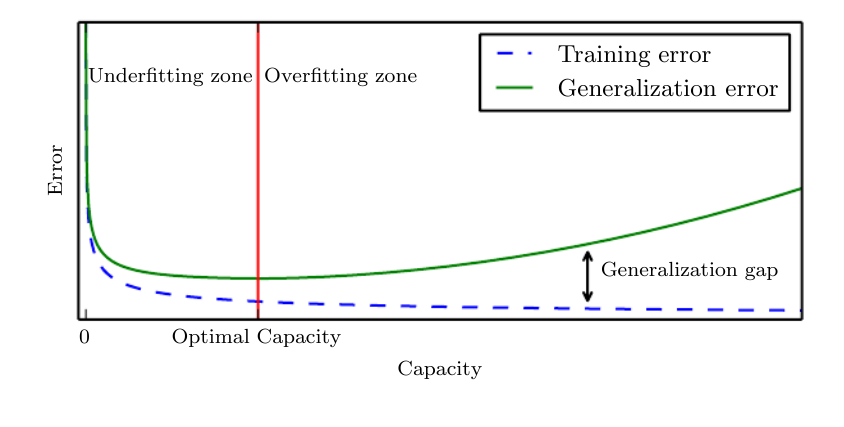

## Reducing overfitting through  weight regularisation

A way of reducing overfitting is acting on the weights of the network through a regularisation procedure,
which acts on the loss function by increasing its value by an amount which depends on the value of the weights in the system:


loss=loss+f(weights)


The most common is the L1 regularisation, which  acts as:

The L1 regularization penalty is computed as:


l1 * sum(abs(weights))


where l1 is a free multiplicative factor which has to be tuned by the user.
Essentially one penalises linearly high weights which tend to come from the network giving too much emphasis to certain features.

The basic implementation in Keras is putting a callback to the regulariser when one adds a layer:

model.add(keras.layers.Dense(nodes,  kernel_regularizer=l1(reg), activation='tanh'))

where <b>reg</b> is the value of the regularisation factor

A too high value of L1 removes overfitting, but it may slow down dramatically the settling of the network into the desired minimum, a too low value of l1 has no effect

On our default 240k deep all model we try to apply regularisation values of 1e-5, 5e-5, 1e-4

We load models trained in these conditions, and we inspect how the history changes


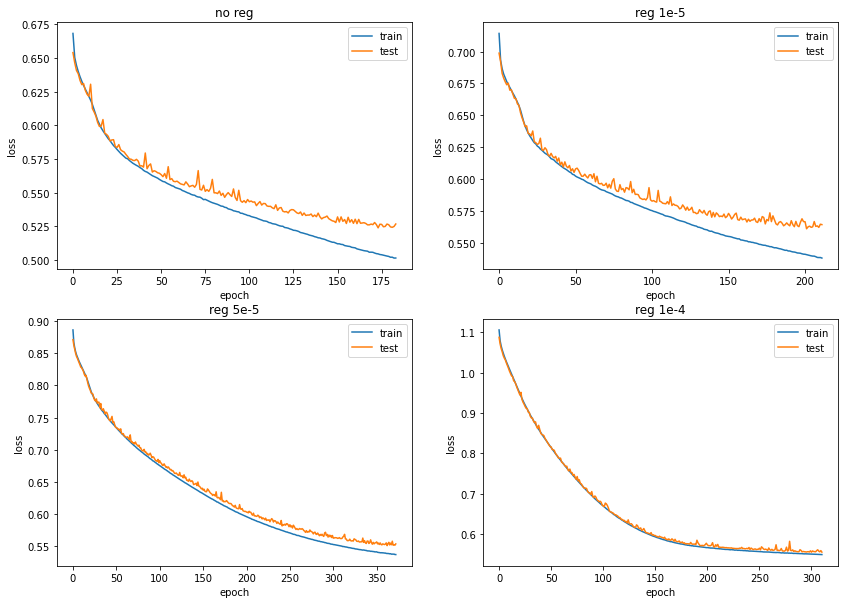

In [25]:
his1='https://www.dropbox.com/s/q2qpli48kmwcfr6/240kdefhist_deep_all.csv?dl=1'
his2='https://www.dropbox.com/s/23718r9vtq8haen/240k_hist_reg1e5_deep_all.csv?dl=1'
his3='https://www.dropbox.com/s/ry4y58fyxsslkxg/240k_hist_reg5e5_deep_all.csv?dl=1'
his4='https://www.dropbox.com/s/tnnv3awvp043z4k/240k_hist_reg1e4_deep_all.csv?dl=1'
fig= plt.figure(figsize=(14,10))
plt.subplot(2, 2,1)
plothis_file(his1,'no reg')
plt.subplot(2, 2,2)
plothis_file(his2,'reg 1e-5')
plt.subplot(2, 2,3)
plothis_file(his3,'reg 5e-5')
plt.subplot(2, 2,4)
plothis_file(his4,'reg 1e-4')
plt.show()    

One has to go to a regularisation factor of 1e-4 in order to get train and test to match.

Looking at the scale of the loss, though, it is not clear that the reduction in the overfitting is not badly offset by the slowing down in the decrease of the loss.

Lets try to evaluate the effect with the usual indicators: ROC and significance

loading models
models loaded
no reg  auc  0.8185176970484177
reg 1e-5  auc  0.8160929065843678
reg 5e-5  auc  0.8153852428822623
reg 1e-4  auc  0.797955167431241
no reg:
 max significance is   2.047973097925728  nbg  51.3724074978241  nsig  16.425613975384266  cut  0.9217758
 background efficiency:  0.01027448149956482  signal efficiency:  0.16425613975384265
reg 1e-5:
 max significance is   1.9948403698216501  nbg  59.86371452225784  nsig  17.36524681904978  cut  0.9206379
 background efficiency:  0.011972742904451567  signal efficiency:  0.1736524681904978
reg 5e-5:
 max significance is   1.9385313305110168  nbg  68.24888020888615  nsig  18.10825629100259  cut  0.9078964
 background efficiency:  0.01364977604177723  signal efficiency:  0.1810825629100259
reg 1e-4:
 max significance is   1.732304893895281  nbg  127.26346402870061  nsig  23.197776643412173  cut  0.87147266
 background efficiency:  0.025452692805740123  signal efficiency:  0.2319777664341217


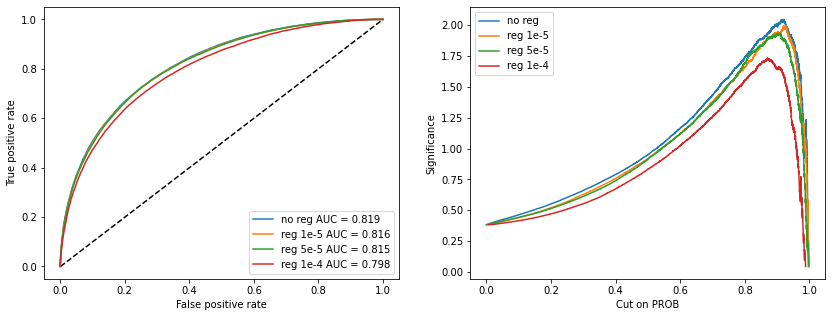

In [26]:
import os
import os.path

print('loading models')
if(os.path.exists('240k_mod_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/ernqamitd2n0m32/240k_mod_deep_all.h5')
if(os.path.exists('240k_reg1e5_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/fvb7xr7rfhmuhsb/240k_reg1e5_deep_all.h5')
if(os.path.exists('240k_reg5e5_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/3wexewb1y4ityab/240k_reg5e5_deep_all.h5')
if(os.path.exists('240k_reg1e4_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/zjmjavsfbo7gxak/240k_reg1e4_deep_all.h5')
print('models loaded')

fig= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)    
plt.plot([0.001, 1], [0, 1], 'k--')
Ypred1=pred_model("240k_mod_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred1,"no reg")
Ypred2=pred_model("240k_reg1e5_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred2,"reg 1e-5") 
Ypred3=pred_model("240k_reg5e5_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred3,"reg 5e-5")
Ypred4=pred_model("240k_reg1e4_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred4,"reg 1e-4") 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

plt.subplot(1, 2,2)
thr, signi, imax=plot_signi_base(y_testa, Ypred1, 100, 5000, 0.05, 'no reg')
thr, signi, imax=plot_signi_base(y_testa, Ypred2, 100, 5000, 0.05, 'reg 1e-5')
thr, signi, imax=plot_signi_base(y_testa, Ypred3, 100, 5000, 0.05, 'reg 5e-5')
thr, signi, imax=plot_signi_base(y_testa, Ypred4, 100, 5000, 0.05, 'reg 1e-4')
plt.legend(loc='best')
plt.show()


## Reducing overfitting through dropout layers

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper
http://jmlr.org/papers/v15/srivastava14a.html (interesting and very practical)

From  https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

Figure from the original paper

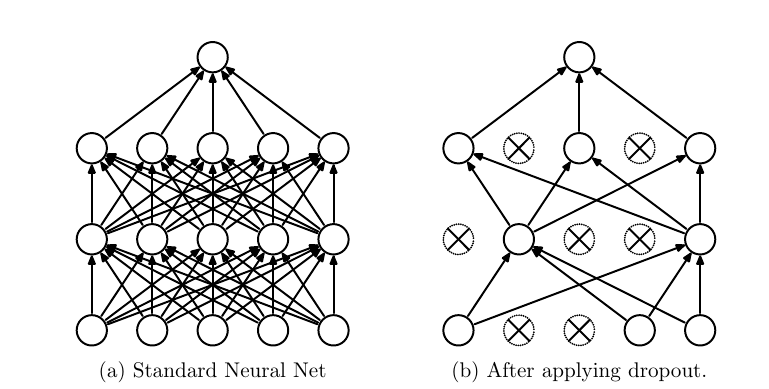

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliant on context for a neuron during training is referred to complex co-adaptations.

You can imagine that if neurons are randomly dropped out of the network during training, that other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.

Said in another way, with dropout effectively one is optimising on an ensemble of different smaller networks

In keras dropout is applied adding after each layer on which one wants to apply dropout  the line:

model.add(Dropout(drop))

where 'drop' is the fraction of nodes that one wants to drop, for which a typical starting number is 0.5

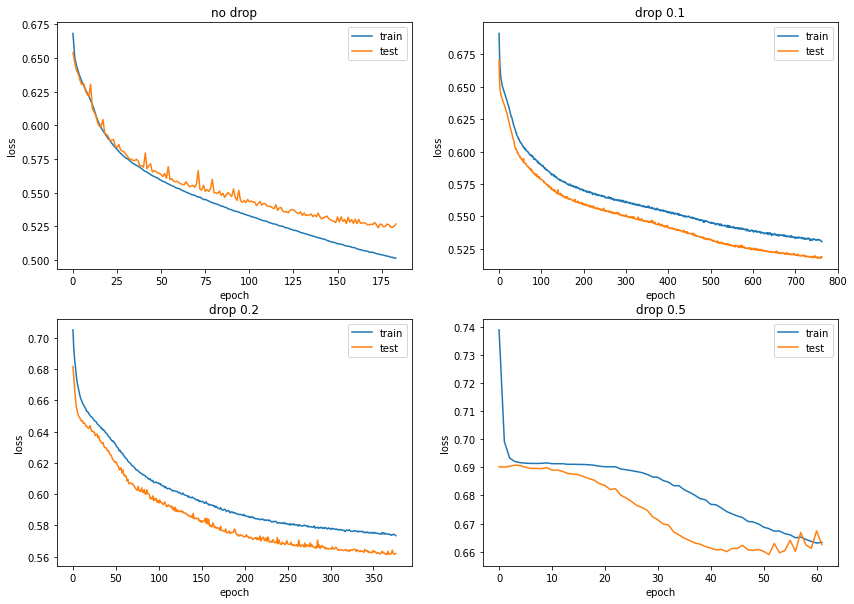

In [27]:
his1='https://www.dropbox.com/s/q2qpli48kmwcfr6/240kdefhist_deep_all.csv?dl=1'
his2='https://www.dropbox.com/s/eorzc543dt46in9/240k_hist_dr01_deep_all.csv?dl=1'
his3='https://www.dropbox.com/s/jy6hn3r2gebx423/240k_hist_dr02_deep_all.csv?dl=1'
his4='https://www.dropbox.com/s/i5fwbui6ll08daq/240k_hist_dr05_deep_all.csv?dl=1'
    
fig= plt.figure(figsize=(14,10))
plt.subplot(2, 2,1)
plothis_file(his1,'no drop')
plt.subplot(2, 2,2)
plothis_file(his2,'drop 0.1')
plt.subplot(2, 2,3)
plothis_file(his3,'drop 0.2')
plt.subplot(2, 2,4)
plothis_file(his4,'drop 0.5')
plt.show()    

    

loading models
models loaded
no drop  auc  0.8185176970484177
drop 0.1  auc  0.8192314828459495
drop 0.2  auc  0.7793449029675187
drop 0.5  auc  0.6598421494872737
no drop:
 max significance is   2.047973097925728  nbg  51.3724074978241  nsig  16.425613975384266  cut  0.9217758
 background efficiency:  0.01027448149956482  signal efficiency:  0.16425613975384265
drop 0.1:
 max significance is   2.081826307316871  nbg  62.411106629587955  nsig  18.562002533416518  cut  0.907909
 background efficiency:  0.012482221325917591  signal efficiency:  0.1856200253341652
drop 0.2:
 max significance is   1.6105948899402531  nbg  152.10053707516929  nsig  24.069347550715595  cut  0.855019
 background efficiency:  0.030420107415033856  signal efficiency:  0.24069347550715595
drop 0.5:
 max significance is   0.6719713126648883  nbg  421.0626870741078  nsig  19.979959540960053  cut  0.70041335
 background efficiency:  0.08421253741482157  signal efficiency:  0.19979959540960052


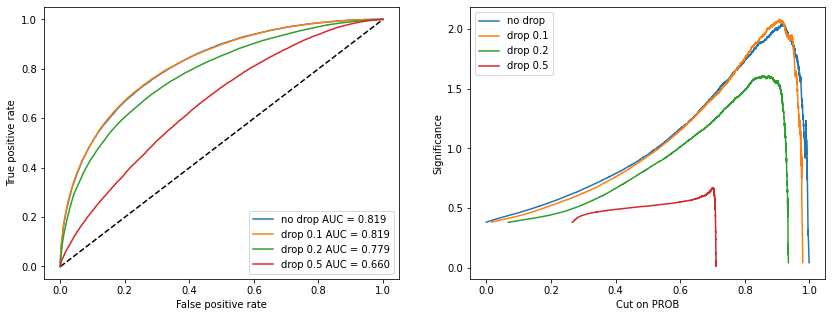

In [28]:
import os
import os.path

print('loading models')
if(os.path.exists('240k_mod_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/ernqamitd2n0m32/240k_mod_deep_all.h5')
if(os.path.exists('240k_dr01_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/y89b44vphuhdh6c/240k_dr01_deep_all.h5')
if(os.path.exists('240k_dr02_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/19knnphepf3lga8/240k_dr02_deep_all.h5')
if(os.path.exists('240k_dr05_deep_all.h5')==False):
  os.system('wget https://www.dropbox.com/s/9mzwz82uwtagwmf/240k_dr05_deep_all.h5')
print('models loaded')

fig= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)    
plt.plot([0.001, 1], [0, 1], 'k--')
Ypred1=pred_model("240k_mod_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred1,"no drop")
Ypred2=pred_model("240k_dr01_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred2,"drop 0.1") 
Ypred3=pred_model("240k_dr02_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred3,"drop 0.2")
Ypred4=pred_model("240k_dr05_deep_all.h5", X_testa)
plot_roc_base(y_testa,Ypred4,"drop 0.5") 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

plt.subplot(1, 2,2)
thr, signi, imax=plot_signi_base(y_testa, Ypred1, 100, 5000, 0.05, 'no drop')
thr, signi, imax=plot_signi_base(y_testa, Ypred2, 100, 5000, 0.05, 'drop 0.1')
thr, signi, imax=plot_signi_base(y_testa, Ypred3, 100, 5000, 0.05, 'drop 0.2')
thr, signi, imax=plot_signi_base(y_testa, Ypred4, 100, 5000, 0.05, 'drop 0.5')
plt.legend(loc='best')
plt.show()
